In [1]:
#instantiate cursor and load libraries
import json
import pandas as pd
import requests
import mysql.connector
import time
import config
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pandas.io.json import json_normalize

In [59]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.password,
    database = "water")

cursor = cnx.cursor()

# EDA

In [60]:
df = cursor.execute("""SELECT * 
                       FROM water.water_tablefinal
                       WHERE water_tablefinal.Contaminant = 'Lead'
                       ;""")
df = pd.DataFrame(cursor.fetchall())

df.columns = [x[0] for x in cursor.description]

In [62]:
df

,ActivityIdentifier,MonitoringLocationIdentifier,AnalysisStartDate,Contaminant,DetectedLevel,LevelUnit,ActivityMediaSubdivisionName,LatitudeMeasure,LongitudeMeasure,id,County,State
0,nwisak.01.01800124,USGS-15015595,2018-02-21,Lead,0.130,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
1,nwisak.01.01800138,USGS-15015595,2018-03-29,Lead,0.053,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
2,nwisak.01.01800138,USGS-15015595,2018-04-30,Lead,0.080,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
3,nwisak.01.01800195,USGS-15015595,2018-05-09,Lead,0.021,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
4,nwisak.01.01800195,USGS-15015595,2018-05-23,Lead,0.360,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
5,nwisak.01.01800245,USGS-15015595,2018-07-16,Lead,0.690,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
6,nwisak.01.01800282,USGS-15015595,2018-07-25,Lead,1.190,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
7,nwisak.01.01800282,USGS-15015595,2018-07-12,Lead,0.024,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
8,nwisak.01.01800358,USGS-15015595,2018-08-17,Lead,0.665,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska
9,nwisak.01.01800358,USGS-15015595,2018-08-21,Lead,3.510,ug/l,Surface Water,56.2402,-130.8820,USGS-15015595,Ketchikan Gateway Borough,Alaska


In [63]:
df.groupby('State')['DetectedLevel'].mean()

State
Alaska                0.564133
Arizona               4.987475
Arkansas              0.279875
California            0.303833
Colorado              7.830829
Connecticut           0.200440
Delaware              3.651657
Dist. of Columbia     1.408667
Florida               7.611111
Georgia               9.703740
Idaho                63.358364
Illinois             14.878545
Iowa                  0.311571
Kansas                0.157000
Louisiana             0.295800
Maryland              0.323455
Massachusetts         0.377378
Minnesota             0.167647
Missouri              4.888850
Montana               1.773588
Nebraska              0.758294
Nevada               16.624474
New Hampshire         0.187000
New Jersey            1.307071
New Mexico            6.009113
New York              0.185341
North Carolina        0.746956
North Dakota          1.074875
Ohio                  1.330000
Oklahoma              0.135000
Oregon                0.285620
Pennsylvania          2.378467
So

# Is New York water really the best?

In [21]:
statesdf = cursor.execute("""SELECT * 
                             FROM water.water_tablefinal
                             WHERE water_tablefinal.Contaminant = 'Lead'
                             ;""")
statesdf = pd.DataFrame(cursor.fetchall())

statesdf.columns = [x[0] for x in cursor.description]

In [22]:
states = ['New York', 'Illinois', 'California']
statesdf = statesdf[statesdf['State'].isin(states)]

In [68]:
len(statesdf[statesdf['State']== 'New York'])

170

In [71]:
len(statesdf[statesdf['State']== 'Illinois'])

22

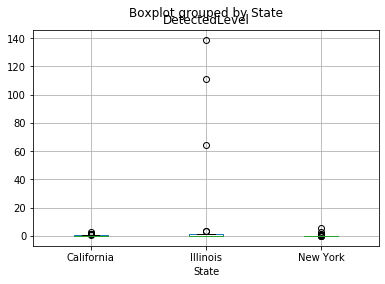

In [24]:
statesdf.boxplot('DetectedLevel', by='State')

In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [26]:
anova_season = ols('DetectedLevel~State',data=statesdf).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DetectedLevel   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     20.93
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           3.14e-09
Time:                        11:14:13   Log-Likelihood:                -1121.6
No. Observations:                 300   AIC:                             2249.
Df Residuals:                     297   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3038      0.984      0.309      0.758      -1.632       2.240
State[T.Illinois]    14.5747      2.391      6.095      0.000       9.869      19.281
State[T.New York]    -0.1185      1.258     -0.094      0.925      -2.594       2.357
==============================================================================
Omnibus:                      500.532   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128233.827
Skew:                           9.084   Prob(JB):                         0.00
Kurtosis:                     102.642   Cond. No.                         4.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# examine the anova table 
aov_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)

<function anova_table at 0x1c1982c1e0>


In [66]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [67]:
anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
region,1.110475e+05,3.0,37015.826000,5.830872,0.00057,0.004581,0.003794
Residual,2.412970e+07,3801.0,6348.249187,NaN,NaN,NaN,NaN


In [30]:
nydf = statesdf[statesdf['State'] == 'New York']

In [37]:
nydf.mean()

DetectedLevel        0.185341
LatitudeMeasure     42.037606
LongitudeMeasure   -82.507426
dtype: float64

In [42]:
illinoisdf = statesdf[statesdf['State'] == 'Illinois']

In [43]:
illinoisdf.mean()

DetectedLevel        14.878545
LatitudeMeasure      43.561850
LongitudeMeasure   -101.157123
dtype: float64

In [39]:
californiadf = statesdf[statesdf['State'] == 'California']

In [41]:
californiadf.mean()

DetectedLevel         0.303833
LatitudeMeasure      35.312647
LongitudeMeasure   -117.831056
dtype: float64

We'll now perform a one-way ANOVA between NYC, Chicago, and LA.

In [153]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Analyzing Water Quality vs. Median Income

In [163]:
incomedf = cursor.execute("""SELECT * 
                             FROM water.water_tablefinal  
                             LEFT JOIN water.countyincomes2
                             ON water_tablefinal.County = countyincomes2.County 
                             AND water_tablefinal.State = countyincomes2.State
                             ;""")
incomedf = pd.DataFrame(cursor.fetchall())

incomedf.columns = [x[0] for x in cursor.description]

In [62]:
leadincomedf = incomedf.drop(incomedf[incomedf.Contaminant != 'Lead'].index)

In [63]:
leadincomedf.head()

,ActivityIdentifier,MonitoringLocationIdentifier,AnalysisStartDate,Contaminant,DetectedLevel,LevelUnit,ActivityMediaSubdivisionName,LatitudeMeasure,LongitudeMeasure,id,County,State,State,County,Avg_Income,region
0,nwisaz.01.01800202,USGS-332000112411501,2018-05-01,Lead,0.401,ug/l,Groundwater,33.3335,-112.688,USGS-332000112411501,Apache County,Arizona,Arizona,Apache County,31476.0,W
1,nwisaz.01.01800073,USGS-332430112101001,None,Lead,20.000,ug/l,Surface Water,33.4084,-112.170,USGS-332430112101001,Apache County,Arizona,Arizona,Apache County,31476.0,W
2,nwisaz.01.01800073,USGS-332430112101001,None,Lead,0.800,ug/l,Surface Water,33.4084,-112.170,USGS-332430112101001,Apache County,Arizona,Arizona,Apache County,31476.0,W
3,nwisaz.01.01900005,USGS-355224113511401,None,Lead,0.005,ug/l,Groundwater,35.8733,-113.855,USGS-355224113511401,Apache County,Arizona,Arizona,Apache County,31476.0,W
4,nwisaz.01.01800256,USGS-360443112083300,None,Lead,0.026,ug/l,Groundwater,36.0808,-112.143,USGS-360443112083300,Apache County,Arizona,Arizona,Apache County,31476.0,W


We analyzed detected lead levels as the dependent variable of median income.
Our hypothesis was Ho = detected lead levels are not correlated with median income levels by county
Ha = detected lead levels are higher in lower median income counties

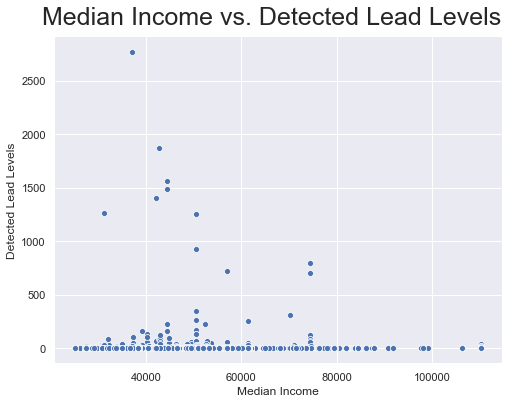

In [81]:
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8,6))
sns.despine(f, left=True, bottom=True)

fig = sns.scatterplot(leadincomedf.Avg_Income, leadincomedf.DetectedLevel)
fig.figure.suptitle('Median Income vs. Detected Lead Levels', y=0.95,fontsize = 25)
fig.set(xlabel='Median Income', ylabel='Detected Lead Levels')
plt.rcParams["axes.labelsize"] = 20

In [72]:
leadincomedf.corr()

,DetectedLevel,LatitudeMeasure,LongitudeMeasure,Avg_Income
DetectedLevel,1.000000,0.056195,-0.070357,-0.027804
LatitudeMeasure,0.056195,1.000000,-0.329207,0.195690
LongitudeMeasure,-0.070357,-0.329207,1.000000,0.199894
Avg_Income,-0.027804,0.195690,0.199894,1.000000


Median income and detected lead levels have a correlation coefficient of -0.03, showing almost no relation between the two.

# Lead Levels by Region

In [45]:
regionaldf = cursor.execute("""SELECT * 
                             FROM water.water_tablefinal
                             JOIN water.countyincomes2
                             ON water_tablefinal.State = countyincomes2.State
                             AND water_tablefinal.County = countyincomes2.County
                             WHERE water_tablefinal.Contaminant = 'Lead'
                             ;""")
regionaldf = pd.DataFrame(cursor.fetchall())

regionaldf.columns = [x[0] for x in cursor.description]

In [72]:
regionaldf.head()

,ActivityIdentifier,MonitoringLocationIdentifier,AnalysisStartDate,Contaminant,DetectedLevel,LevelUnit,ActivityMediaSubdivisionName,LatitudeMeasure,LongitudeMeasure,id,County,State,State,County,Avg_Income,region
0,nwisaz.01.01800202,USGS-332000112411501,2018-05-01,Lead,0.401,ug/l,Groundwater,33.3335,-112.688,USGS-332000112411501,Apache County,Arizona,Arizona,Apache County,31476.0,W
1,nwisaz.01.01800073,USGS-332430112101001,None,Lead,20.000,ug/l,Surface Water,33.4084,-112.170,USGS-332430112101001,Apache County,Arizona,Arizona,Apache County,31476.0,W
2,nwisaz.01.01800073,USGS-332430112101001,None,Lead,0.800,ug/l,Surface Water,33.4084,-112.170,USGS-332430112101001,Apache County,Arizona,Arizona,Apache County,31476.0,W
3,nwisaz.01.01900005,USGS-355224113511401,None,Lead,0.005,ug/l,Groundwater,35.8733,-113.855,USGS-355224113511401,Apache County,Arizona,Arizona,Apache County,31476.0,W
4,nwisaz.01.01800256,USGS-360443112083300,None,Lead,0.026,ug/l,Groundwater,36.0808,-112.143,USGS-360443112083300,Apache County,Arizona,Arizona,Apache County,31476.0,W


In [75]:
len(regionaldf[regionaldf['region']== 'N'])

1101

In [76]:
len(regionaldf[regionaldf['region']== 'S'])

775

In [77]:
len(regionaldf[regionaldf['region']== 'M'])

561

In [78]:
len(regionaldf[regionaldf['region']== 'W'])

1368

In [53]:
anova_season = ols('DetectedLevel~region',data=regionaldf).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DetectedLevel   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.831
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           0.000570
Time:                        11:50:17   Log-Likelihood:                -22055.
No. Observations:                3805   AIC:                         4.412e+04
Df Residuals:                    3801   BIC:                         4.414e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7966      3.364      1.426      0.154      -1.799      11.392
region[T.N]    -3.4214      4.133     -0.828      0.408     -11.525       4.682
region[T.S]    -0.5779      4.417     -0.131      0.896      -9.237       8.081
region[T.W]     9.2275      3.995      2.310      0.021       1.396      17.059
==============================================================================
Omnibus:                     8790.282   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55083166.835
Skew:                          22.382   Prob(JB):                         0.00
Kurtosis:                     590.735   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# examine the anova table 
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)

              df        sum_sq       mean_sq         F   PR(>F)
region       3.0  1.110475e+05  37015.826000  5.830872  0.00057
Residual  3801.0  2.412970e+07   6348.249187       NaN      NaN


In [55]:
regionaldf.groupby('region')['DetectedLevel'].mean()

region
M     4.796558
N     1.375168
S     4.218686
W    14.024106
Name: DetectedLevel, dtype: float64

# Create map using Geopy

In [67]:
# conda install geopandas

In [68]:
# conda install bokeh

In [19]:
# Import geopandas package
import geopandas as gpd
# Read in shapefile and examine data
contiguous_usa = gpd.read_file('/Users/cblessen/Documents/FlatironSchool/Projects/Water/WaterQualityProject2/cb_2018_us_county_20m.shp')
contiguous_usa.head()

DriverError: Unable to open /Users/cblessen/Documents/FlatironSchool/Projects/Water/WaterQualityProject2/cb_2018_us_county_20m.shx or /Users/cblessen/Documents/FlatironSchool/Projects/Water/WaterQualityProject2/cb_2018_us_county_20m.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [21]:
SHAPE_RESTORE_SHX=YES fio info myshapefile.shp

SyntaxError: invalid syntax (<ipython-input-21-56828b4f3267>, line 1)

In [ ]:
str(contiguous_usa.iloc[0]['geometry'])

In [ ]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = pop_states.to_json())

In [ ]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40000000)
# Define custom tick labels for color bar.
tick_labels = {‘0’: ‘0’, ‘5000000’: ‘5,000,000’,
 ‘10000000’:’10,000,000', ‘15000000’:’15,000,000',
 ‘20000000’:’20,000,000', ‘25000000’:’25,000,000',
 ‘30000000’:’30,000,000', ‘35000000’:’35,000,000',
 ‘40000000’:’40,000,000+’}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = ‘horizontal’,
                     major_label_overrides = tick_labels)
# Create figure object.
p = figure(title = ‘Lead Levels in Water Samples, 2018’, 
           plot_height = 600, plot_width = 950, 
           toolbar_location = ‘below’,
           tools = “pan, wheel_zoom, box_zoom, reset”)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches(‘xs’,’ys’, source = geosource,
                   fill_color = {‘field’ :'POPESTIMATE2018',
                                 ‘transform’ : color_mapper},
                   line_color = ‘gray’, 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [(‘State’,’@NAME’),
                               (‘Population’, ‘@POPESTIMATE2018’)]))
# Specify layout
# p.add_layout(color_bar, ‘below’)
show(p)

In [ ]:
lead_sites = lead_per_l.merge(sites_no_dup,
                          left_on = ‘MonitoringLocationIdentifier’,
                          right_on = ‘MonitoringLocationIdentifier’)
lead_sites_sorted = lead_sites.sort_values(by = ‘ActivityStartDate’)
# After dropping duplicates by date, 12,249 data points
lead_sites_dropdup = lead_sites_sorted.drop_duplicates(subset = [‘MonitoringLocationIdentifier’, ‘ActivityStartDate’], keep = ‘last’).reset_index(drop = True)
# Drop data points not in the contiguous USA, 10,341 data points
lead_sites_dropdup = lead_sites_dropdup[(lead_sites_dropdup[‘LongitudeMeasure’] <= -60) 
                 & (lead_sites_dropdup[‘LongitudeMeasure’] >= -130)
                 & (lead_sites_dropdup[‘LatitudeMeasure’] <= 50) 
                 & (lead_sites_dropdup[‘LatitudeMeasure’] >= 20)]
# Create Month column for plotting Slider
lead_sites_dropdup[‘Month’] = [int(x.split(‘-’)[1]) for x in lead_sites_dropdup[‘ActivityStartDate’]]
# Create shapely.Point objects based on longitude and latitude
geometry = []
for index, row in lead_sites_dropdup.iterrows():
    geometry.append(Point(row[‘LongitudeMeasure’], 
                          row[‘LatitudeMeasure’]))
lead_sites_contig = lead_sites_dropdup.copy()
lead_sites_contig[‘geometry’] = geometry